In [2]:
def threshold(values):
    label=[]
    for i in (values):
        if i<25:
            label.append('u')
        elif i>75:
             label.append('o')
        else:
             label.append('n')
    return label

In [25]:
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
import datetime
from matplotlib import pyplot
series = pd.read_csv('planetlab02.csv', header=0)
series["timestamp"]=pd.to_datetime(series["timestamp"],unit='s')
series.columns=['Time','use']
series.dropna()
series.set_index('Time',inplace=True)
series.head()

1728


<AxesSubplot:xlabel='Time'>

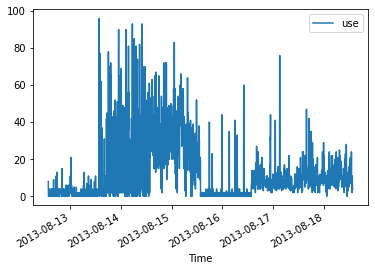

In [26]:
series.plot()

In [27]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(series['use'])
print(result)
series['shift5']=series['use']-series['use'].shift(1)
result2=adfuller(series['shift5'].dropna())
print(result2)

(-2.9616040100657735, 0.0386390290577307, 17, 1710, {'1%': -3.434179908502461, '5%': -2.863231689892687, '10%': -2.567670609760268}, 13412.093687543127)
(-15.17694036118285, 6.275491349900973e-28, 16, 1710, {'1%': -3.434179908502461, '5%': -2.863231689892687, '10%': -2.567670609760268}, 13411.96426342693)


<AxesSubplot:xlabel='Time'>

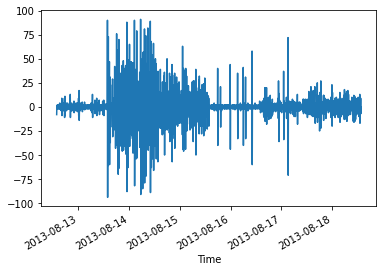

In [29]:
series['shift5'].plot()

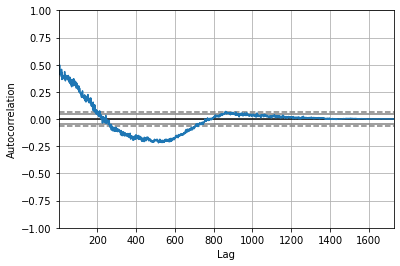

In [31]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series['use'])
plt.show()

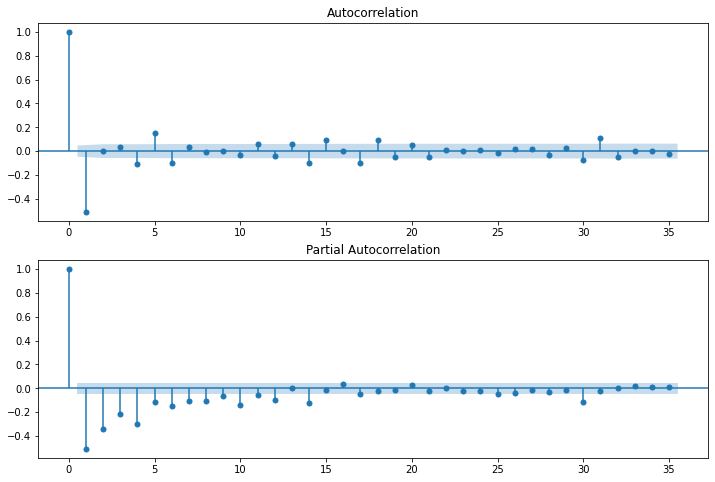

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
fig1=sm.graphics.tsaplots.plot_acf(series['shift5'].dropna(),lags=35,ax=ax1)
fig1=sm.graphics.tsaplots.plot_pacf(series['shift5'].dropna(),lags=35,ax=ax2)

In [35]:
from statsmodels.tsa.arima_model import ARIMA

In [66]:
model=ARIMA(series['use'],order=(1,0,2))
model_fit=model.fit()

c:\users\mohammed mudassir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\mohammed mudassir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583

In [67]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    use   No. Observations:                 1728
Model:                     ARMA(1, 2)   Log Likelihood               -6807.916
Method:                       css-mle   S.D. of innovations             12.433
Date:                Tue, 19 Jan 2021   AIC                          13625.832
Time:                        11:44:04   BIC                          13653.105
Sample:                             0   HQIC                         13635.920
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9672      4.733      2.317      0.020       1.691      20.244
ar.L1.use      0.9954      0.002    405.759      0.000       0.991       1.000
ma.L1.use     -0.9490      0.025    -38.727      0.000      -0.997      -0.901
ma.L2.use      0.0301      0.025      1.209      0.227      -0.019       0.079
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0047           +0.0000j            1.0047            0.0000
MA.1            1.0916           +0.0000j            1.0916            0.0000
MA.2           30.3873           +0.0000j           30.3873            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Time'>

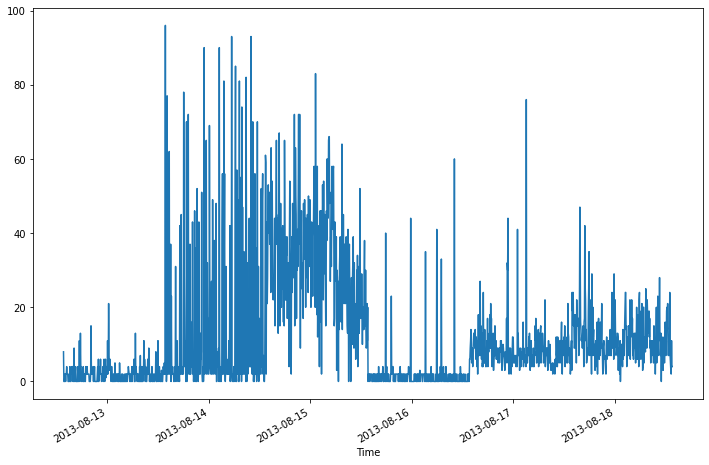

In [68]:
series['use'].plot(figsize=(12,8))

<AxesSubplot:xlabel='Time'>

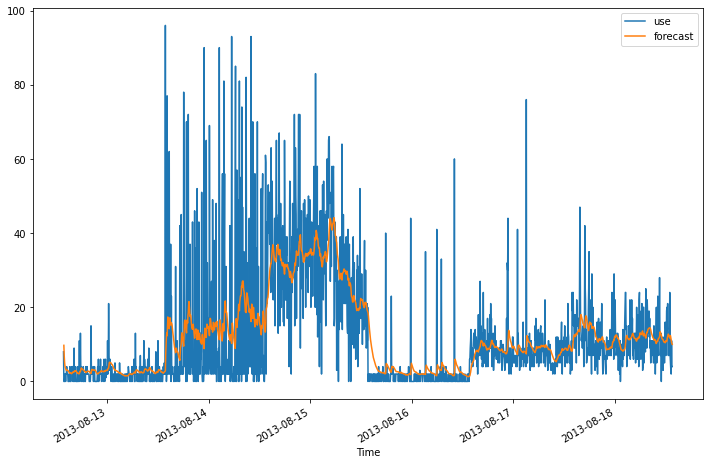

In [69]:
series['forecast']=model_fit.predict(start=1,end=1727)
series[['use','forecast']].plot(figsize=(12,8))

In [70]:
series.head()

,use,shift5,forecast
Time,,,
2013-08-12 13:40:46,8,NaN,NaN
2013-08-12 13:45:46,0,-8.0,9.738502
2013-08-12 13:50:46,0,0.0,6.918216
2013-08-12 13:55:46,0,0.0,5.262342
2013-08-12 14:00:46,2,2.0,4.243054


In [71]:
forecast_errors = [series['forecast'][i]-series['use'][i] for i in range(1,len(series['use']))]

In [72]:
mean_forecast_error = sum(forecast_errors) * 1.0/len(forecast_errors)
print('MEAN : ',mean_forecast_error)

MEAN :  -0.10375012764900933


In [73]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(series['use'][1::],series['forecast'].dropna()) 
print('MAE: %f' % mae)
mse = mean_squared_error(series['use'][1::],series['forecast'].dropna()) 
print('MSE: %f' % mse)
rmse = (mse)**(1/2)
print('RMSE: %f' % rmse)

MAE: 7.305654
MSE: 154.687447
RMSE: 12.437341


In [74]:
from sklearn.metrics import confusion_matrix
import numpy as np
testLabels=threshold(series['use'])
predLabels=threshold(series['forecast'])
conf_mat = confusion_matrix(testLabels,predLabels)
acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
print('Overall accuracy: {} %'.format(acc*100))

Overall accuracy: 89.69907407407408 %
